go run the code below if file not exist:
'scClass/scClass_modelC/notebook/CordBlood_preprocessing.ipynb and PBMC68k_preprocessing.ipynb'

In [1]:
import datetime
time_start = datetime.datetime.now()
print('start time:',time_start)

start time: 2022-03-11 16:45:57.915587


In [2]:
filename_data = "../../dataset/PBMC68k_modelC.h5ad"

In [3]:
scClass_path = !cd ..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.train import Model

In [4]:
import scanpy as sc
import pandas as pd
import numpy as np

In [5]:
adata = sc.read_h5ad(filename_data)

In [6]:
adata = scClass.pp.preprocess(adata,filter=False,random=False,normalize=True)

normalizing data


In [7]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_docker/scClass/scClass_modelC/scClass/data/model_default.pkl


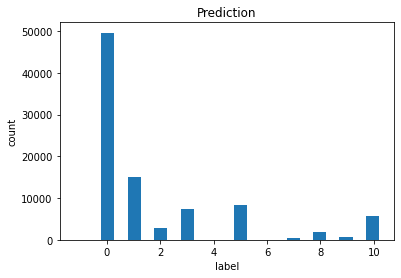

In [8]:
y_pred = scClass.predict(adata,model)

In [9]:
# scClass.save_predict('y_pred_cordblood.csv',y_pred)

## Verify with previous label

total acc: 85.548377256534 %


,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,natural killer cell
6,erythrocyte
7,megakaryocyte
8,monocyte

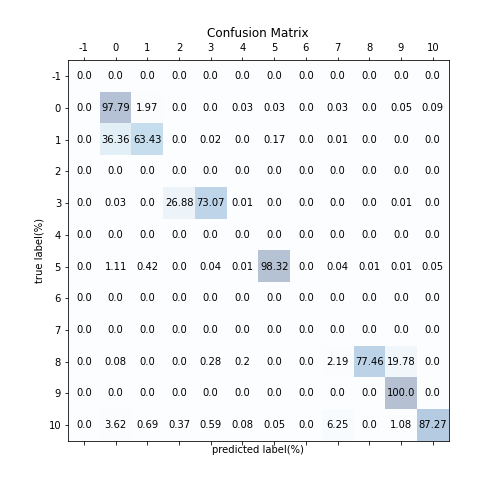

In [10]:
y_true = adata.obs['modelC id'].values 
fig = scClass.confusion_matrix(y_pred,y_true)
scClass.figure_html(fig)

In [11]:
y_pred[y_pred==2] = 3 #B cell
scClass.plot_performance(y_pred,y_true)

/home/shhsu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Performance,Value
0,accuary,0.885019
1,precision,0.891752
2,recall,0.841914
3,f1-score,0.813651


In [12]:
time_end = datetime.datetime.now()
print('-------------Time Record---------------')
print('start time:',time_start)
print('  end time:',time_end)
print('---------Run time----------')
delta = time_end-time_start
print(delta.seconds//60,'min,',delta.seconds%60,'sec')

-------------Time Record---------------
start time: 2022-03-11 16:45:57.915587
  end time: 2022-03-11 16:46:34.874349
---------Run time----------
0 min, 36 sec
